# 5주차 스터디

* 스터디 내용 : Housing data set 사용 / Mnist사용해서 Model 만들기

* cv와 grid_search 가르치기

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [174]:
from sklearn.datasets import load_wine
df = load_wine(as_frame=True) # 3가지 종류의 와인

X = df['data']
y = df['target']

# 멀티 클래스 회귀를 단일 클래스 회귀로 변경하겠습니다
y_binary = (y == 1).astype('int')

In [175]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [177]:
# 결측치 있는 지 확인
X.isnull().sum().sum() , y.isna().sum().sum()   # na와 null은 동일하다, 둘 중 하나가 더 익숙한 사람을 위해 만들어 둔 것

(0, 0)

In [213]:
# 훈련셋과 테스트 셋 분리해주기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y_binary, train_size=0.8) # default 0.75
X_train.shape, X_test.shape

((142, 13), (36, 13))

### 분류기 평가 Metric 


* 정확도 / 정밀도 / 재현율

In [214]:
# 간단하게 모형 만들어보기
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train) 

DecisionTreeClassifier()

In [215]:
# Tree기반 모델은 변수 중요도(feature_importance)를 확인할 수 있습니다
tree_model.feature_importances_

array([0.02781021, 0.10232126, 0.02714009, 0.        , 0.00926428,
       0.        , 0.        , 0.        , 0.        , 0.75859843,
       0.        , 0.01924119, 0.05562454])

In [216]:
tree_model.feature_names_in_ # petal은 꽃잎

array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'], dtype=object)

In [217]:
# 분류기의 경우에 score는 단순한 정확도를 리턴 (accuracy score)
tree_model.score(X_train, y_train)

# 단일 Tree는 무조건 오버피팅 하기 때문에, 정확도가 1.0이 나오는 것을 확인할 수 있다.

1.0

In [218]:
# test-set에 대한 점수를 확인해 봅시다
tree_model.score(X_test,y_test)

0.9166666666666666

목표로 하는 task에 따라서 중요하게 생각해야하는 Metric이 달라진다 (통계학의 1종오류, 2종오류 개념과 유사)

* 정확도(Accuracy)  : 전체 데이터 수 중 예측 결과와 실제 값이 동일한 건수(TN + TP)가 차지하는 비율

* 정밀도(Precision) : 예측을 Positive로 한 대상(FP + TP) 중 예측과 실제 값이 Positive로 일치한 데이터(TP)의 비율

* 재현율(Recall) : 실제가 Positive인 대상(FN + TP) 중 예측과 실제 값이 Positive로 일치한 데이터(TP)의 비율



In [219]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,tree_model.predict(X_test)) # 실제는 positive인데, 예측을 negative로 한 값이 하나 존재한다

array([[22,  3],
       [ 0, 11]], dtype=int64)

In [225]:
# 분류의 경우 정확도 말고도 사용할 수 있는 다양한 성능평가 지표들이 있습니다. 
## 그 중에서 정밀도와 재현율을 배워보겠습니다

from sklearn.metrics import precision_score, recall_score

print("모델의 정확도: ", tree_model.score(X_test,y_test))
print("모델의 정밀도: ", precision_score(y_test, tree_model.predict(X_test)))
print("모델의 재현율: ", recall_score(y_test, tree_model.predict(X_test)))

모델의 정확도:  0.9166666666666666
모델의 정밀도:  0.7857142857142857
모델의 재현율:  1.0


### Cross-Validation 소개

* Test-set을 미리 들여다 보는 우를 범하지 않기 위해 사용함

In [226]:
# 훈련하고 성과 측정하기 
from sklearn.model_selection import cross_val_score

tree_model = DecisionTreeClassifier()

# cv=5이면 데이터를 5번 쪼갠다. 데이터는 반드시 Random해야 한다!
cv_score = cross_val_score(tree_model, X_train, y_train, cv=5, n_jobs=-1, verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished


In [227]:
print(cv_score)

# cv_score의 평균
cv_score.mean()

[0.96551724 0.89655172 0.89285714 0.92857143 0.89285714]


0.9152709359605913

### Grid-Search 소개

* Grid-Search
* Random-search

In [237]:
from sklearn.model_selection import GridSearchCV

tree_model = DecisionTreeClassifier()

param_grid = {"criterion" : ["gini","entropy"],  
              'max_depth': [10,20,30,40,50]} 

model_reg = GridSearchCV(tree_model, param_grid, cv=10, verbose=True, n_jobs=-1)
model_reg.fit(X_train,y_train)

model_reg.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'criterion': 'entropy', 'max_depth': 10}

In [240]:
model_reg.score(X_train, y_train)

1.0

In [243]:
# Random Search
from sklearn.model_selection import RandomizedSearchCV

random_forest = DecisionTreeClassifier()
param_grid = {'max_depth':range(10,40)}

random_reg = RandomizedSearchCV(random_forest, param_grid, n_iter=10, cv=5, n_jobs=-1, verbose=True)
random_reg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(10, 40)},
                   verbose=True)

In [244]:
random_reg.best_estimator_

DecisionTreeClassifier(max_depth=28)

### Mnist Dataset을 이용한 분류기 만들어 보기!

* 숫자 손글씨를 인식하는 분류기를 만들어 봅시다

In [249]:
from sklearn.datasets import fetch_openml

df = fetch_openml('mnist_784', version=1, as_frame=False)

X = df['data']
y = df['target']

In [252]:
X.shape

(70000, 784)

In [253]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

3


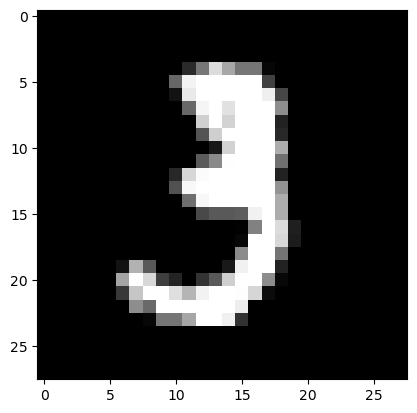

In [272]:
# 예시로 그림을 확인해 보겠습니다
# 28*28 = 784

number = 10
sample = X[number].reshape(28,28)

print(y[number])
plt.imshow(sample, cmap='gray');

In [273]:
# 훈련 세트와 테스트 세트를 분리해주겠습니다
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [276]:
# 그리드 서치로 최적의 모델을 찾아봅시다 (대략 5분 정도 소요됩니다)
from sklearn.ensemble import RandomForestClassifier
random_model = RandomForestClassifier(n_estimators=500, n_jobs=-1)

param_grid = {"criterion" : ["gini", "entropy"],
              "max_depth" : [40,50,60]}

random_clf = GridSearchCV(random_model, param_grid=param_grid, cv=3, verbose=True)
random_clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=500, n_jobs=-1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [40, 50, 60]})

In [279]:
random_clf.best_params_

{'criterion': 'gini', 'max_depth': 60}

In [280]:
# 최적의 모델의 성능을 평가해봅시다

random_clf.score(X_train, y_train)

1.0

In [281]:
random_clf.score(X_test, y_test)

0.9712